<a href="https://colab.research.google.com/github/zedeme/Argentinian-Birds/blob/main/gh_ArgentinianBirds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_csv("/content/sample_data/0083021-210914110416597.csv", sep="\t")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
df

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,3295716693,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS990816535,Animalia,Chordata,Aves,Passeriformes,Mimidae,Mimus,Mimus saturninus,NaN,SPECIES,"Mimus saturninus (Lichtenstein, 1823)",Mimus saturninus,NaN,AR,"La Adela La Pampa AR (-38.987, -64.093)",Río Negro,PRESENT,NaN,e2e717bf-551a-4917-bdc9-4fa0f342c530,-38.986588,-64.093414,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-04T00:00:00,4,10,2020,5231675,5231675,HUMAN_OBSERVATION,CLO,EBIRD,OBS990816535,NaN,NaN,NaN,CC_BY_4_0,NaN,obsr429007,NaN,NaN,2021-12-01T21:13:53.814Z,NaN,NaN
1,1200515657,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD_ARG:OBS286791889,Animalia,Chordata,Aves,Passeriformes,Emberizidae,Zonotrichia,Zonotrichia capensis,NaN,SPECIES,"Zonotrichia capensis (P.L.Statius Müller, 1776)",Zonotrichia capensis,NaN,AR,Pedro Luro--Laguna La Salada,Buenos Aires,PRESENT,NaN,e2e717bf-551a-4917-bdc9-4fa0f342c530,-39.451450,-62.704380,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-15T00:00:00,15,12,2014,5231103,5231103,HUMAN_OBSERVATION,CLO,EBIRD_ARG,OBS286791889,NaN,NaN,NaN,CC_BY_4_0,NaN,obsr426915,NaN,NaN,2021-12-01T21:19:36.427Z,NaN,NaN
2,3214991044,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS1115635550,Animalia,Chordata,Aves,Falconiformes,Falconidae,Caracara,Caracara plancus,NaN,SPECIES,"Caracara plancus (J.F.Miller, 1777)",Caracara plancus,NaN,AR,Lago Epecuén--Balneario Carhué,Buenos Aires,PRESENT,1.0,e2e717bf-551a-4917-bdc9-4fa0f342c530,-37.162370,-62.771890,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-08T00:00:00,8,2,2015,2480989,2480989,HUMAN_OBSERVATION,CLO,EBIRD,OBS1115635550,NaN,NaN,NaN,CC_BY_4_0,NaN,obsr2027734,NaN,NaN,2021-12-01T20:59:01.573Z,NaN,NaN
3,1769772056,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS439033078,Animalia,Chordata,Aves,Passeriformes,Fringillidae,Spinus,Spinus magellanicus,NaN,SPECIES,"Spinus magellanicus (Vieillot, 1805)",Spinus magellanicus,NaN,AR,"Pabellón Sur, campus de Agronomía",La Pampa,PRESENT,3.0,e2e717bf-551a-4917-bdc9-4fa0f342c530,-36.561060,-64.304245,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-28T00:00:00,28,10,2016,7341745,7341745,HUMAN_OBSERVATION,CLO,EBIRD,OBS439033078,NaN,NaN,NaN,CC_BY_4_0,NaN,obsr415195,NaN,NaN,2021-12-01T21:21:46.847Z,NaN,NaN
4,3209476037,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD_ARG:OBS1001683007,Animalia,Chordata,Aves,Passeriformes,Icteridae,Sturnella,Sturnella loyca,NaN,SPECIES,"Leistes loyca (Molina, 1782)",Leistes loyca,NaN,AR,Ea. San Antonio Viejo,Buenos Aires,PRESENT,18.0,e2e717bf-551a-4917-bdc9-4fa0f342c530,-39.697544,-62.094727,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-17T00:00:00,17,10,2020,9667237,2484272,HUMAN_OBSERVATION,CLO,EBIRD_ARG,OBS1001683007,NaN,NaN,NaN,CC_BY_4_0,NaN,obsr1039883,NaN,NaN,2021-12-01T21:27:22.116Z,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107247,3214521601,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD_ARG:OBS1016637160,Animalia,Chordata,Aves,Passeriformes,Tyrannidae,Tyrannus,Tyrannus melancholicus,NaN,SPECIES,"Tyrannus melancholicus Vieillot, 1819",Tyrannus melancholicus,NaN,AR,laguna aledaña a Darregueira,Buenos Aires,PRESENT,NaN,e2e717bf-551a-4917-bdc9-4fa0f342c530,-37.689774,-63.141327,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-20T00:00:00,20,11,2017,5229662,52

In [5]:
df.describe()

,gbifID,infraspecificEpithet,verbatimScientificNameAuthorship,individualCount,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,day,month,year,taxonKey,speciesKey,recordNumber,identifiedBy,dateIdentified,rightsHolder,typeStatus,establishmentMeans,mediaType
count,1.072520e+05,0.0,0.0,90332.000000,107252.000000,107252.000000,0.0,0.0,0.0,0.0,0.0,0.0,107252.000000,107252.000000,107252.000000,1.072520e+05,1.072520e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2.405060e+09,NaN,NaN,13.097939,-38.002893,-63.187079,NaN,NaN,NaN,NaN,NaN,NaN,14.874287,7.865280,2017.287967,3.937760e+06,3.512880e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6.237524e+08,NaN,NaN,167.206415,1.127824,1.005028,NaN,NaN,NaN,NaN,NaN,NaN,8.662034,3.485213,3.878007,2.297936e+06,1.864297e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.469212e+08,NaN,NaN,1.000000,-39.944550,-65.402405,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1920.000000,2.474328e+06,2.474328e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.092406e+09,NaN,NaN,1.000000,-38.916700,-64.270615,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,5.000000,2017.000000,2.482755e+06,2.482747e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.228988e+09,NaN,NaN,3.000000,-38.064920,-62.880013,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,9.000000,2018.000000,2.495165e+06,2.491303e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.786724e+09,NaN,NaN,6.000000,-36.913418,-62.363540,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,11.000000,2019.000000,5.231103e+06,5.229146e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,3.301316e+09,NaN,NaN,30000.000000,-35.972435,-61.407894,NaN,NaN,NaN,NaN,NaN,NaN,31.000000,12.000000,2020.000000,1.106854e+07,1.084991e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dtypes

gbifID                                int64
datasetKey                           object
occurrenceID                         object
kingdom                              object
phylum                               object
class                                object
order                                object
family                               object
genus                                object
species                              object
infraspecificEpithet                float64
taxonRank                            object
scientificName                       object
verbatimScientificName               object
verbatimScientificNameAuthorship    float64
countryCode                          object
locality                             object
stateProvince                        object
occurrenceStatus                     object
individualCount                     float64
publishingOrgKey                     object
decimalLatitude                     float64
decimalLongitude                

In [7]:
df["eventDate"] = df["eventDate"].apply(lambda x: pd.to_datetime(x))
df["lastInterpreted"] = df["lastInterpreted"].apply(lambda x: pd.to_datetime(x))

In [8]:
df[df["countryCode"] == "AR"]["gbifID"].count()

107252

In [9]:
df_ar = df[df["countryCode"] == "AR"]

In [10]:
df_ar["stateProvince"].value_counts().sort_values(ascending=False)

Buenos Aires    63690
La Pampa        41753
Río Negro        1809
Name: stateProvince, dtype: int64

In [135]:
# Dale doble click a la derecha para ver solamente el tipo de ave que estas buscando

# Github no tiene soporte para la libreria plotly, si queres ver el mapa podes verlo desde aca:
# https://colab.research.google.com/drive/1tbHlglUFTnQj4ayVUqgFQVVqISP47KTB?usp=sharing

px.set_mapbox_access_token("pk.eyJ1IjoiY2hlbWlza3kiLCJhIjoiY2tnOGNhcXk3MGZ3eDJ5b2FxZ3ViajN1MyJ9.t3R24lWTwzTQwyJw4vuWFw")
fig = px.scatter_mapbox(df_ar, lat="decimalLatitude", lon="decimalLongitude",     color="family",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=100, zoom=7)
fig.show()

In [35]:
n = df.isnull().sum()

r = []

for i in list(df_ar.columns):
  if n[i] == 107252:
    continue
  r.append(i)
len(r) == len(list(df_ar.columns))

df_ar = df_ar[r]

In [36]:
df_ar

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,taxonRank,scientificName,verbatimScientificName,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,license,recordedBy,lastInterpreted,issue
0,3295716693,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS990816535,Animalia,Chordata,Aves,Passeriformes,Mimidae,Mimus,Mimus saturninus,SPECIES,"Mimus saturninus (Lichtenstein, 1823)",Mimus saturninus,AR,"La Adela La Pampa AR (-38.987, -64.093)",Río Negro,PRESENT,NaN,e2e717bf-551a-4917-bdc9-4fa0f342c530,-38.986588,-64.093414,2020-10-04,4,10,2020,5231675,5231675,HUMAN_OBSERVATION,CLO,EBIRD,OBS990816535,CC_BY_4_0,obsr429007,2021-12-01 21:13:53.814000+00:00,NaN
1,1200515657,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD_ARG:OBS286791889,Animalia,Chordata,Aves,Passeriformes,Emberizidae,Zonotrichia,Zonotrichia capensis,SPECIES,"Zonotrichia capensis (P.L.Statius Müller, 1776)",Zonotrichia capensis,AR,Pedro Luro--Laguna La Salada,Buenos Aires,PRESENT,NaN,e2e717bf-551a-4917-bdc9-4fa0f342c530,-39.451450,-62.704380,2014-12-15,15,12,2014,5231103,5231103,HUMAN_OBSERVATION,CLO,EBIRD_ARG,OBS286791889,CC_BY_4_0,obsr426915,2021-12-01 21:19:36.427000+00:00,NaN
2,3214991044,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS1115635550,Animalia,Chordata,Aves,Falconiformes,Falconidae,Caracara,Caracara plancus,SPECIES,"Caracara plancus (J.F.Miller, 1777)",Caracara plancus,AR,Lago Epecuén--Balneario Carhué,Buenos Aires,PRESENT,1.0,e2e717bf-551a-4917-bdc9-4fa0f342c530,-37.162370,-62.771890,2015-02-08,8,2,2015,2480989,2480989,HUMAN_OBSERVATION,CLO,EBIRD,OBS1115635550,CC_BY_4_0,obsr2027734,2021-12-01 20:59:01.573000+00:00,NaN
3,1769772056,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS439033078,Animalia,Chordata,Aves,Passeriformes,Fringillidae,Spinus,Spinus magellanicus,SPECIES,"Spinus magellanicus (Vieillot, 1805)",Spinus magellanicus,AR,"Pabellón Sur, campus de Agronomía",La Pampa,PRESENT,3.0,e2e717bf-551a-4917-bdc9-4fa0f342c530,-36.561060,-64.304245,2016-10-28,28,10,2016,7341745,7341745,HUMAN_OBSERVATION,CLO,EBIRD,OBS439033078,CC_BY_4_0,obsr415195,2021-12-01 21:21:46.847000+00:00,NaN
4,3209476037,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD_ARG:OBS1001683007,Animalia,Chordata,Aves,Passeriformes,Icteridae,Sturnella,Sturnella loyca,SPECIES,"Leistes loyca (Molina, 1782)",Leistes loyca,AR,Ea. San Antonio Viejo,Buenos Aires,PRESENT,18.0,e2e717bf-551a-4917-bdc9-4fa0f342c530,-39.697544,-62.094727,2020-10-17,17,10,2020,9667237,2484272,HUMAN_OBSERVATION,CLO,EBIRD_ARG,OBS1001683007,CC_BY_4_0,obsr1039883,2021-12-01 21:27:22.116000+00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107247,3214521601,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD_ARG:OBS1016637160,Animalia,Chordata,Aves,Passeriformes,Tyrannidae,Tyrannus,Tyrannus melancholicus,SPECIES,"Tyrannus melancholicus Vieillot, 1819",Tyrannus melancholicus,AR,laguna aledaña a Darregueira,Buenos Aires,PRESENT,NaN,e2e717bf-551a-4917-bdc9-4fa0f342c530,-37.689774,-63.141327,2017-11-20,20,11,2017,5229662,5229662,HUMAN_OBSERVATION,CLO,EBIRD_ARG,OBS1016637160,CC_BY_4_0,obsr973337,2021-12-01 20:59:07.018000+00:00,NaN
107248,3207533626,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS995234868,Animalia,Chordata,Aves,Passeriformes,Tyrannidae,Xolmis,Xolmis irupero,SPECIES,"Xolmis irupero (Vieillot, 1823)",Xolmis irupero,AR,Reserva Natural Municipal Laguna de Utracán,La Pampa,PRESENT,1.0,e2e717bf-551a-4917-bdc9-4fa0f342c530,-37.282320,-64.591240,2020-05-27,27,5,2020,2482747,2482747,HUMAN_OBSERVATION,CLO,EBIRD,OBS995234868,CC_BY_4_0,obsr911499,2021-12-01 20:57:13.206000+00:00,NaN
107249,2745273483,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:cat

In [38]:
df_ar.isnull().sum()

gbifID                         0
datasetKey                     0
occurrenceID                   0
kingdom                        0
phylum                         0
class                          0
order                          0
family                         0
genus                          0
species                        0
taxonRank                      0
scientificName                 0
verbatimScientificName         0
countryCode                    0
locality                       0
stateProvince                  0
occurrenceStatus               0
individualCount            16920
publishingOrgKey               0
decimalLatitude                0
decimalLongitude               0
eventDate                      0
day                            0
month                          0
year                           0
taxonKey                       0
speciesKey                     0
basisOfRecord                  0
institutionCode                0
collectionCode                 0
catalogNum

In [42]:
df[df["issue"].isnull() == False]

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
98827,2197111311,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD_ARG:OBS642579113,Animalia,Chordata,Aves,Gruiformes,Rallidae,Aramides,Aramides cajanea,NaN,SPECIES,"Aramides cajanea (Statius Muller, 1776)",Aramides cajaneus,NaN,AR,Bajo Hondo,Buenos Aires,PRESENT,NaN,e2e717bf-551a-4917-bdc9-4fa0f342c530,-38.763184,-61.91979,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-21,21,6,2015,2474659,2474659,HUMAN_OBSERVATION,CLO,EBIRD_ARG,OBS642579113,NaN,NaN,NaN,CC_BY_4_0,NaN,obsr795598,NaN,NaN,2021-12-01 21:22:19.567000+00:00,NaN,TAXON_MATCH_FUZZY


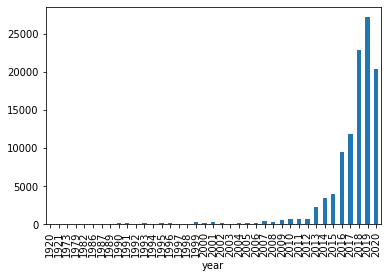

In [95]:
df_ar.groupby("year")["gbifID"].count().plot.bar()

In [136]:
df_ar["family"].value_counts().sort_values(ascending=False)

Tyrannidae           11477
Columbidae            8864
Furnariidae           8282
Anatidae              7395
Falconidae            7379
Icteridae             7239
Thraupidae            5165
Psittacidae           3585
Mimidae               3445
Emberizidae           3146
Hirundinidae          3125
Charadriidae          3064
Tinamidae             2626
Laridae               2470
Troglodytidae         2447
Picidae               2401
Ardeidae              2377
Rallidae              2107
Accipitridae          2020
Podicipedidae         1911
Strigidae             1485
Scolopacidae          1476
Cotingidae            1443
Recurvirostridae      1282
Passeridae            1257
Cathartidae           1120
Cuculidae             1101
Fringillidae          1066
Phoenicopteridae       931
Threskiornithidae      886
Phalacrocoracidae      803
Turdidae               766
Rheidae                705
Rhinocryptidae         361
Trochilidae            283
Motacillidae           270
Cardinalidae           206
H

In [151]:
round((df_ar["family"].value_counts().sort_values(ascending=False) / 107252) * 100, 3) # Percent

Tyrannidae           10.701
Columbidae            8.265
Furnariidae           7.722
Anatidae              6.895
Falconidae            6.880
Icteridae             6.750
Thraupidae            4.816
Psittacidae           3.343
Mimidae               3.212
Emberizidae           2.933
Hirundinidae          2.914
Charadriidae          2.857
Tinamidae             2.448
Laridae               2.303
Troglodytidae         2.282
Picidae               2.239
Ardeidae              2.216
Rallidae              1.965
Accipitridae          1.883
Podicipedidae         1.782
Strigidae             1.385
Scolopacidae          1.376
Cotingidae            1.345
Recurvirostridae      1.195
Passeridae            1.172
Cathartidae           1.044
Cuculidae             1.027
Fringillidae          0.994
Phoenicopteridae      0.868
Threskiornithidae     0.826
Phalacrocoracidae     0.749
Turdidae              0.714
Rheidae               0.657
Rhinocryptidae        0.337
Trochilidae           0.264
Motacillidae        